# Data Description:
Salaries vary dramatically even within the same occupation.Two workers, each with same position and job responsibilities may earn different salaries.There are various factors which influence one's annual income Education, Years of Experience, Geographic location, performance reports,Certifications and more.In this Dataset there are 14 dependent or input features and 1 target feature.

# Problem Statement:
This task is to determine whether a person makes over 50K income in a year. Objective is to perform EDA, find the missing values if any,find the outliers,and lastly build varios machine learning models with salary as target feature and find the best ML model.



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("/content/drive/MyDrive/data/adult.csv")
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [67]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [68]:
df.shape

(48842, 15)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [70]:
#Statistical Analysis
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [71]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [72]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [73]:
df.replace('?',np.nan,inplace=True)
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [74]:
df.shape

(48842, 15)

In [75]:
#finding percentage of missing values
round(df.isnull().sum() * 100 / len(df.index), 2)


age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [76]:
df.shape

(48842, 15)

In [77]:
df = df.loc[df['native-country'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)


age                0.00
workclass          5.74
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.76
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     0.00
income             0.00
dtype: float64

In [78]:
df = df.loc[df['occupation'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [79]:
len(df.index)

45222

In [80]:
# Calculating percentage of rows we have lost
(48842-len(df.index))*100/48842

7.411653904426518

# Observation:
We have lost 7.41% of rows while removing the missing values.It's not an issue because we have 45222 number of datapoints in our dataset.

## Univariate Analysis

In [81]:
num_feature = df.select_dtypes(include=['int64'])
num_feature.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb2b6843d0>,
      dtype=object)

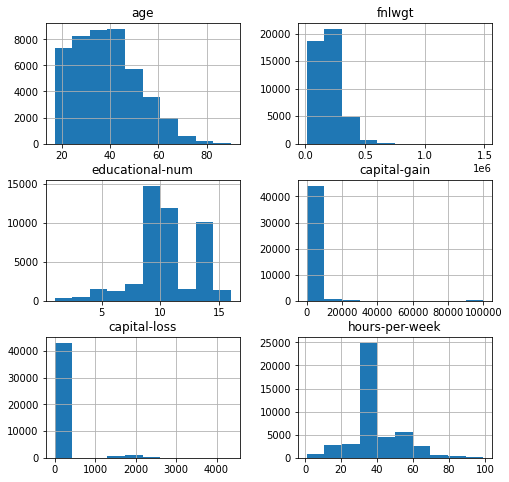

In [82]:
num_feature.hist(figsize=(8,8))

In [83]:
cat_feature = df.select_dtypes(include='object')
cat_feature.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

Text(0.5, 1.0, 'Income vs occupation')

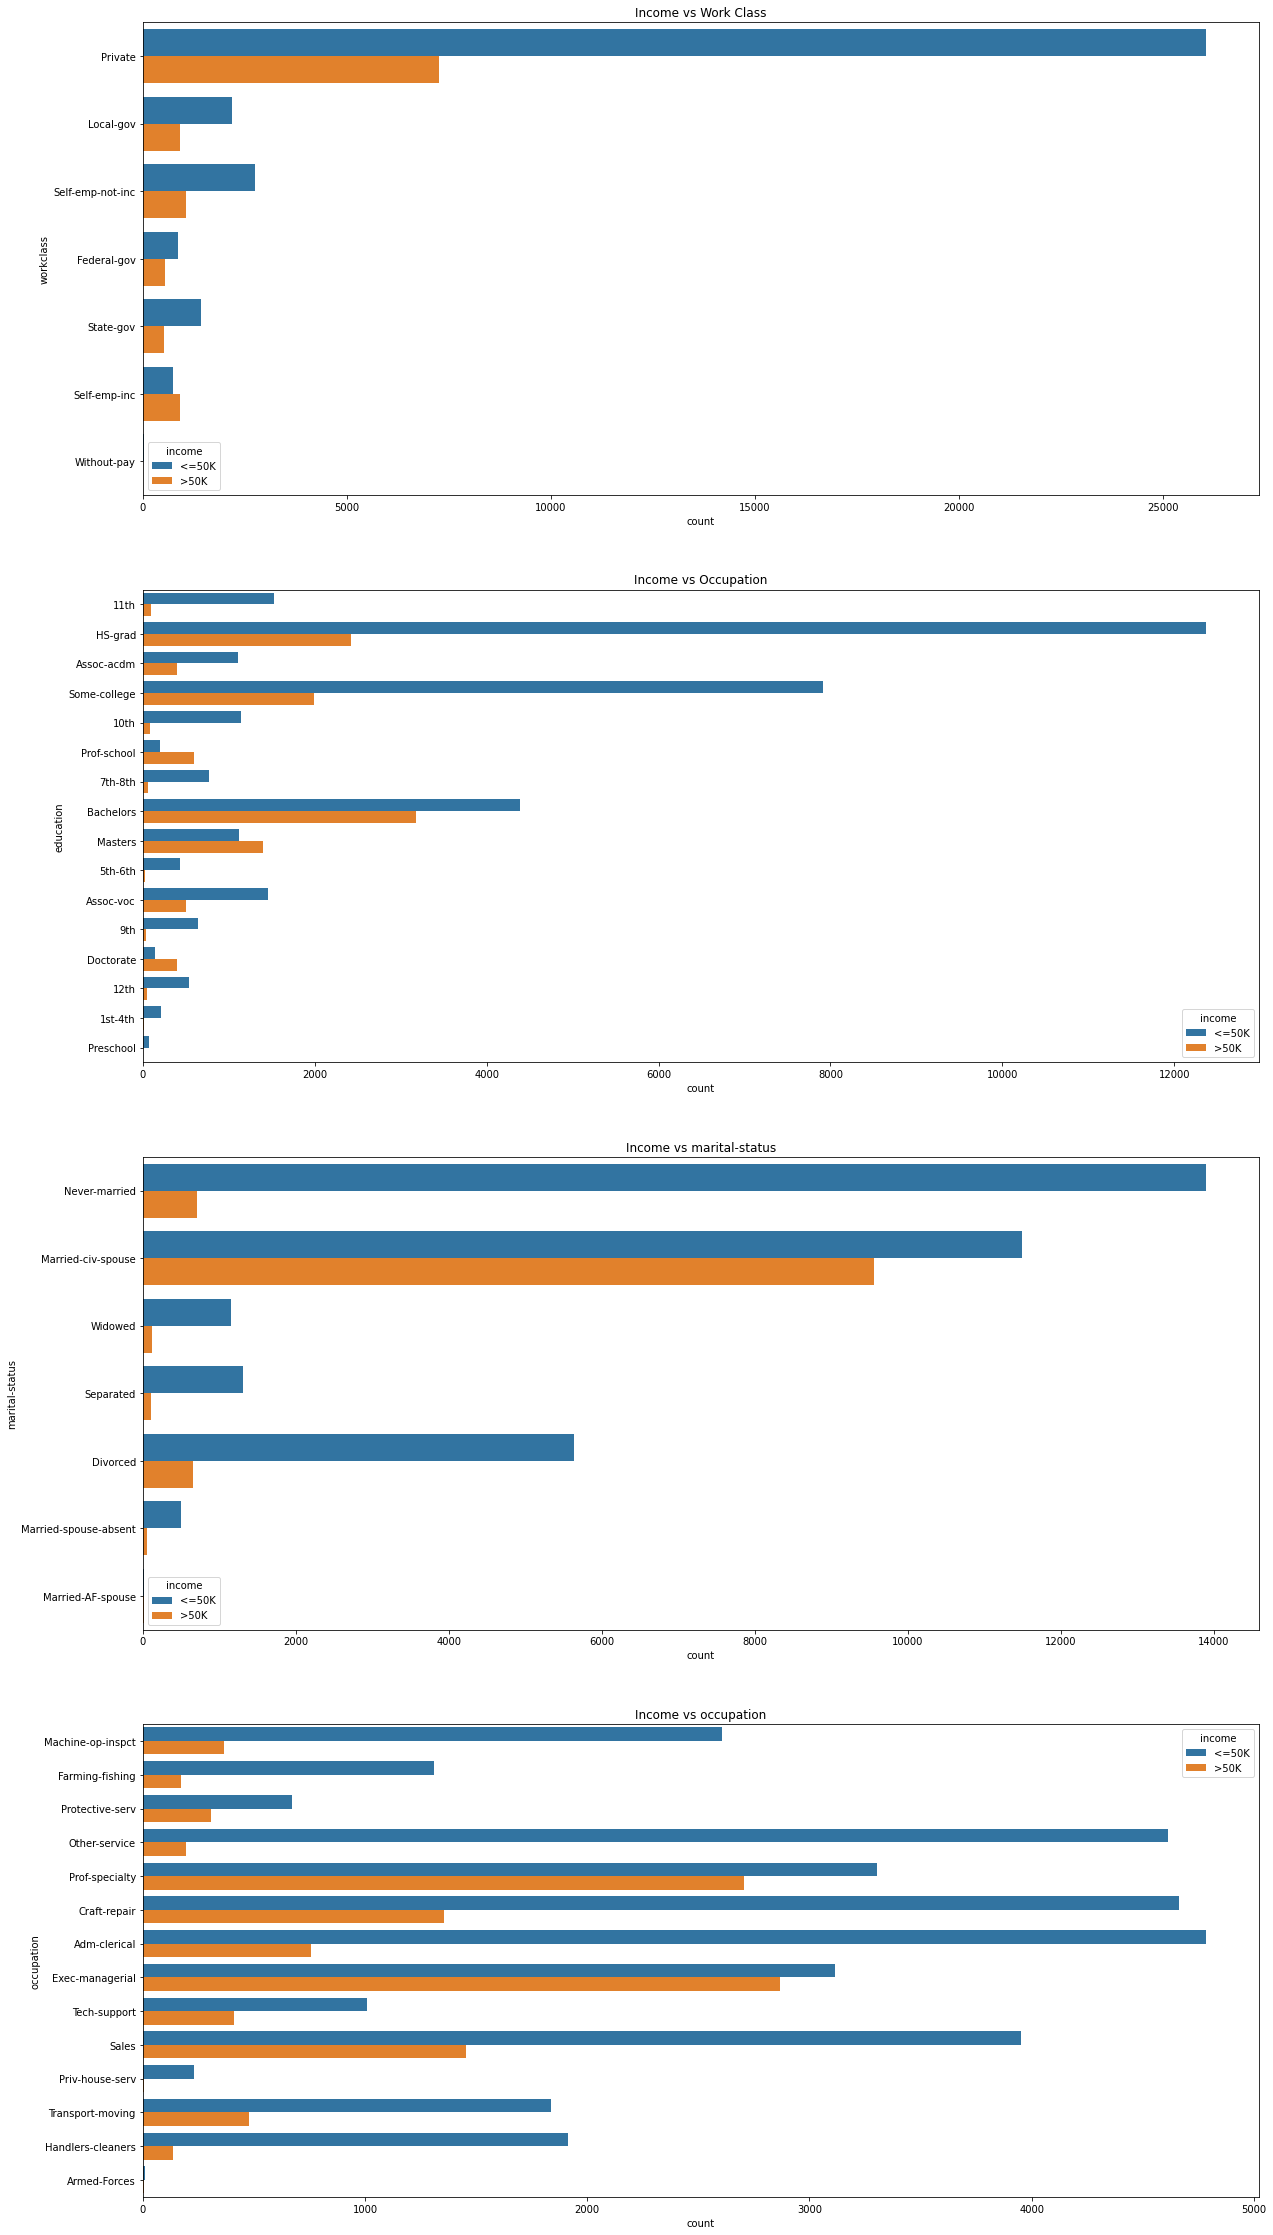

In [84]:
plt.figure(figsize=(20, 40))

plt.subplot(411)
sns.countplot(y='workclass', hue='income', data = cat_feature)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='education', hue='income', data = cat_feature)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='marital-status', hue='income', data=cat_feature)
plt.title('Income vs marital-status')

plt.subplot(414)
sns.countplot(y='occupation', hue='income', data=cat_feature)
plt.title('Income vs occupation')




Observation:
1. Age and final weight attributes are right-skewed and not Symmetric.
2. As per Hours per week attribute 25000 of people work for 30-40 hours per week(maximum).
3. Capital gain shows either person has earn highest or no income.
1. As we can observe from income vs workclass distribution, individual working in private firm earns more income than the employee working in rest of workclases.
2. Individual who have completed High School grad degree earns more income than individual who are qualified with other degrees.
3. As per Occupational Distribution,adm-clerical has the highest count whereas armed force has minimum.
5. In income vs marital status never married has highest count whereas married-AF has lowest.

##   Bivarite Analysis:
We need to check if other attributes have any effect on the income.

first lets analyse it with categorical columns.

In [85]:
df['gender'].value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

In [86]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [87]:
df['income'].value_counts(normalize=True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [88]:
df['gender'].value_counts(normalize=True)

Male      0.675048
Female    0.324952
Name: gender, dtype: float64

In [89]:
df['income_category'] ="null"
df.loc[df['income']== '>50K',['income_category']]= 'high income'
df.loc[df['income']== '<=50K',['income_category']]='low income'
df.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
5     low income
Name: income_category, dtype: object

In [90]:
# Lets now look at the racewise distribution of income
racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race'], 
                                      aggfunc = 'count')
racewise_income_dist


income_category
income race                               
<=50K  Amer-Indian-Eskimo              382
       Asian-Pac-Islander              934
       Black                          3694
       Other                           308
       White                         28696
>50K   Amer-Indian-Eskimo               53
       Asian-Pac-Islander              369
       Black                           534
       Other                            45
       White                         10207

In [91]:
# Let us also look into the racewise gender distibution of income

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race', 'gender'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              152
                          Male                230
       Asian-Pac-Islander Female              371
                          Male                563
       Black              Female             1958
                          Male               1736
       Other              Female              117
                          Male                191
       White              Female            10428
                          Male              18268
>50K   Amer-Indian-Eskimo Female               14
                          Male                 39
       Asian-Pac-Islander Female               65
                          Male                304
       Black              Female              126
                          Male                408
       Other              Female                9
                          Male                 36
       White              Female             1455
                          Male               8752

## From the above table we can see the the difference between men and women earning salary above 50K is high across all the races and surprisingly black female earns more salary than black male .

In [92]:
df.pivot_table(values=['income'], index=['workclass'], aggfunc='count')


,income
workclass,
Federal-gov,1406
Local-gov,3100
Private,33307
Self-emp-inc,1646
Self-emp-not-inc,3796
State-gov,1946
Without-pay,21


Most number of jobs are provided by Private Sector

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


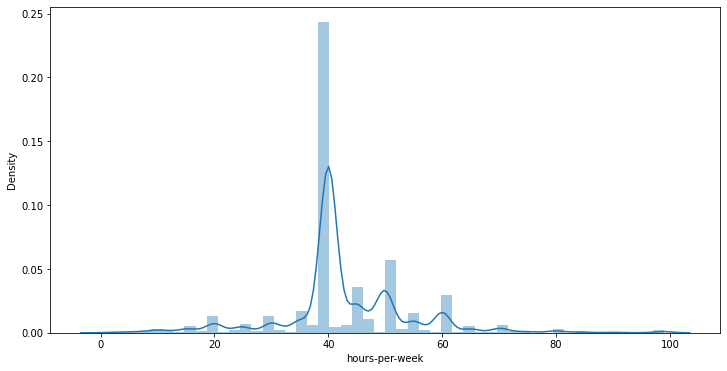

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


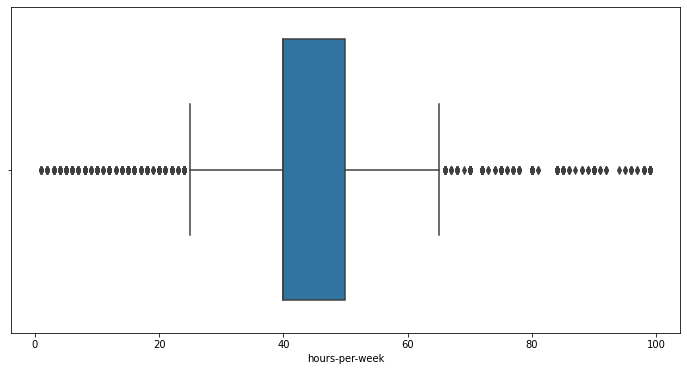

In [93]:
# Plotting distribution and box plots for the number of working hours for males.
working_hours_male = df.loc[df['gender'] == 'Male', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_male['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_male['hours-per-week'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


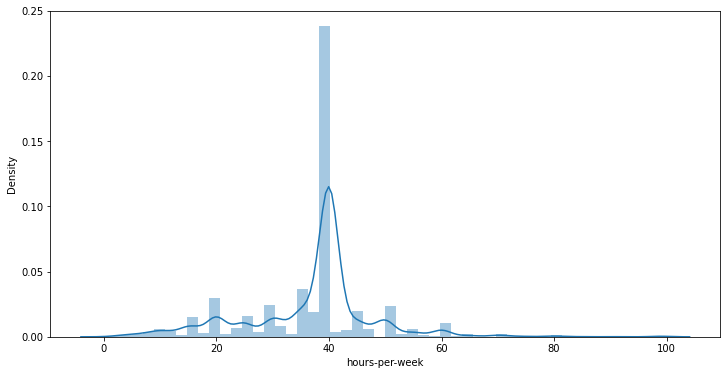

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


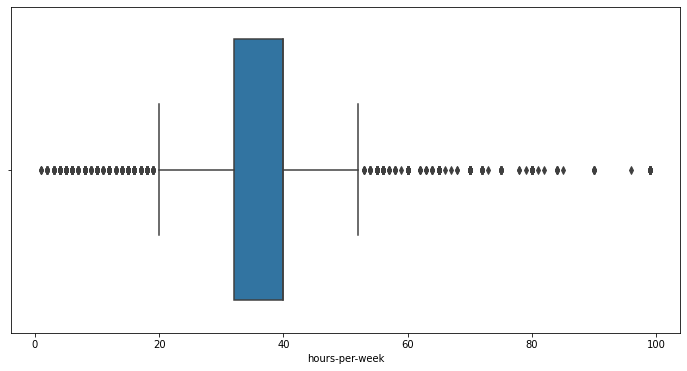

In [94]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = df.loc[df['gender'] == 'Female', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hours-per-week'])
plt.show()

There are high number of outliers in hours per week for both male and female.

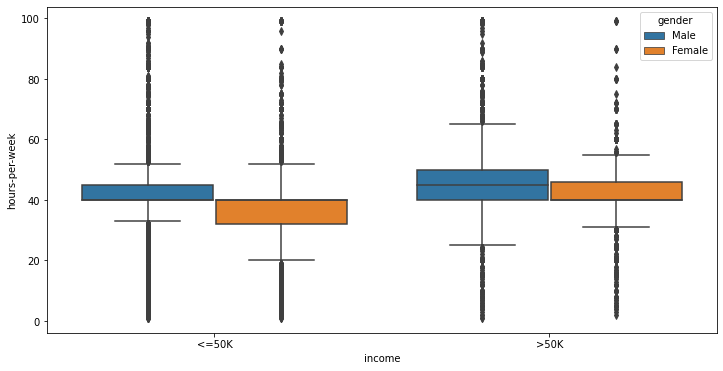

In [95]:
# Grouped boxplot for income, gender and number of hours per week.

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', hue='gender')

WE can observe that male works few hours more compared to females from grouped boxplot

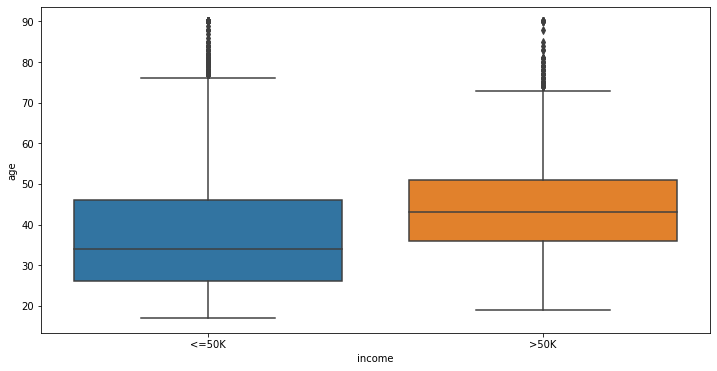

In [96]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')

## Removing Outliers and Unnecessary Columns

In [97]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_category'],
      dtype='object')

In [98]:
df.drop('fnlwgt',axis=1,inplace=True)

In [99]:
# drop rows with age 90
print("Number of observation before removing:", df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age, axis = 0, inplace =True)
print("Number of observation after removing:", df.shape)

Number of observation before removing: (45222, 15)
Number of observation after removing: (45176, 15)


In [100]:
#drop rows with capital gain = 99999
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (45176, 15)
Number of observation after removing: (44947, 15)


In [101]:

df.drop('education',axis=1,inplace=True)

In [102]:
df.drop('income_category',axis=1,inplace=True)

In [103]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [104]:
numerical = df.select_dtypes(include=['int64', 'float64'])

numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [105]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.025420,-1.219743,-0.232520,-0.219315,-0.074097
1,-0.034670,-0.433575,-0.232520,-0.219315,0.760953
2,-0.796786,0.745676,-0.232520,-0.219315,-0.074097
3,0.422600,-0.040492,2.767105,-0.219315,-0.074097
4,-0.339516,-1.612827,-0.232520,-0.219315,-0.909146


In [106]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_cat.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [107]:
df = pd.concat([df_num, df_cat], axis=1)

df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.025420,-1.219743,-0.232520,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.034670,-0.433575,-0.232520,-0.219315,0.760953,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.796786,0.745676,-0.232520,-0.219315,-0.074097,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.422600,-0.040492,2.767105,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.339516,-1.612827,-0.232520,-0.219315,-0.909146,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
y = df.pop('income_>50K')

X = df

In [109]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [110]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(31462, 80) (31462,)
(13485, 80) (13485,)


## Training the model

In [111]:
from sklearn.linear_model import LogisticRegression
clf_logit = LogisticRegression()
clf_logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [112]:
X_test.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
22251,-1.635113,-1.612827,-0.23252,-0.219315,-2.579245,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15880,0.193965,0.352592,-0.23252,-0.219315,-0.074097,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21910,0.270177,0.352592,-0.23252,-0.219315,0.760953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28131,-1.254055,-1.612827,-0.23252,4.122404,-1.326671,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27660,0.193965,-0.040492,-0.23252,-0.219315,0.760953,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [122]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 22251 to 376
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        13485 non-null  float64
 1   educational-num                            13485 non-null  float64
 2   capital-gain                               13485 non-null  float64
 3   capital-loss                               13485 non-null  float64
 4   hours-per-week                             13485 non-null  float64
 5   workclass_Local-gov                        13485 non-null  float64
 6   workclass_Private                          13485 non-null  float64
 7   workclass_Self-emp-inc                     13485 non-null  float64
 8   workclass_Self-emp-not-inc                 13485 non-null  float64
 9   workclass_State-gov                        13485 non-null  float64
 10  workclass_Without-pa

In [113]:
y_test_pred = clf_logit.predict(X_test)

In [114]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8459770114942529

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


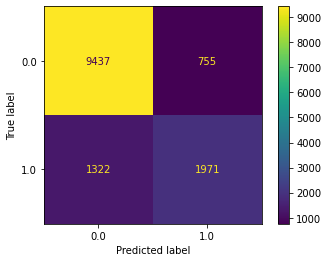

In [115]:
metrics.plot_confusion_matrix(clf_logit, X_test, y_test)

In [116]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10192
         1.0       0.72      0.60      0.65      3293

    accuracy                           0.85     13485
   macro avg       0.80      0.76      0.78     13485
weighted avg       0.84      0.85      0.84     13485

